<h2><center>Análisis de Sistemas de Infraestructura <br>
    Examen final: Parte II <br>
    Punto 1 <br>
    nombre: Pablo Andrés Reyes Rueda<br>Código: 201816456</center></h2>

In [1]:
import pandas as pd #Libreria para manejo de datos y estadistica
import matplotlib.pyplot as plt # importar librería de matplotlib
import numpy as np
import math
import sympy as sym
from sympy import integrate
import scipy as sp
import scipy.stats as ss
from scipy.stats import gamma
import decimal
import seaborn as sns
decimal.getcontext().prec = 5

La variable Y sigue una distribución lognormal con media 10 y cov 0.3, como no se menciona otra variable la covarianza es la misma varianza por lo que la desviación estandar es la raíz cuadrada de la varianza que sería:  $\sqrt{log(1+0,3^2)}$

In [2]:
#Creación de 1000 simulaciones con un estado inicial de 100 hasta un estado crítico de 25 o menos
lambd=0.1
res= np.zeros(1000)
for n in range(1000):
    i = 0
    v0=100
    t_x=0
    while v0>25:
        t_x+=np.random.exponential(1/lambd)
        d_y=np.random.lognormal(np.log(10)-0.5*np.log(1+0.3**2),(np.log(1+0.3**2))**(1/2))
        v0-=d_y
    res[n]=t_x
TMF=res.mean()
res.mean()

80.68055536834288

El tiempo medio a la falla para las 1000 simulaciones realizadas es el siguiente:

El TMF es 80.6806
La desviación estandar es 30.5524
La caja de bigotes para los datos es la siguiente: 


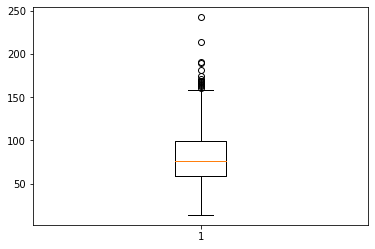

In [3]:
print("El TMF es",round(res.mean(),4))
print("La desviación estandar es",round(res.std(),4))
plt.boxplot(res)
print("La caja de bigotes para los datos es la siguiente: ")
plt.show()


Para el caso de la primera estimación:

$I$ Intervención programada que lleva el sistema hasta as good as new (estado al tiempo
t = 0) y que ocurre en el tiempo $t_{mi} = 0,5 M_f$

In [4]:
lambd=0.1
res_1= np.zeros(1000)
cos_1= np.zeros(1000)
for n in range(1000):
    v0=100
    t_x=0
    arreglado = False
    while v0>25:
        #Sumo el tiempo con una distribución con lambda 0.1 que es igual a 10 debido a que el valor es  1/0.1=10
        t_x+=np.random.exponential(10)
        d_y=np.random.lognormal(np.log(10)-0.5*np.log(1+0.3**2),(np.log(1+0.3**2))**(1/2))
        v0-=d_y
        #verifico si se llego al tiempo de la mitad o menor del valor esperado si es así verifico si ya fue arreglado y lo arreglo una vez
        if t_x <= 0.5*TMF and not arreglado:
            cos_1[n] = 100-v0
            v0 = 100
            arreglado = True
        
    res_1[n]=t_x

TMF_1=res_1.mean()
CMF_1=cos_1.mean()
TMF_1

90.06541313315797

In [5]:
lambd=0.1
res_2= np.zeros(1000)
cos_2= np.zeros(1000)
for n in range(1000):
    v0=100
    t_x=0
    arreglado = False
    while v0>25:
        #Sumo el tiempo con una distribución con lambda 0.1 que es igual a 10 debido a que el valor es  1/0.1=10
        t_x+=np.random.exponential(1/lambd)
        d_y=np.random.lognormal(np.log(10)-0.5*np.log(1+0.3**2),(np.log(1+0.3**2))**(1/2))
        v0-=d_y
        #verifico si se llego al tiempo de la mitad o menor del valor esperado si es así verifico si ya fue arreglado y lo arreglo una vez
        if t_x <= 0.75*TMF and not arreglado:
            cos_2[n] = 100-v0
            v0 = 100
            arreglado = True
        
    res_2[n]=t_x

TMF_2=res_2.mean()
CMF_2=cos_2.mean()
TMF_2

90.59107339257395

In [6]:
lambd=0.1
res_3= np.zeros(1000)
cos_3= np.zeros(1000)
for n in range(1000):
    v0=100
    t_x=0
    arreglado = False
    while v0>25:
        #Sumo el tiempo con una distribución con lambda 0.1 que es igual a 10 debido a que el valor es  1/0.1=10
        t_x+=np.random.exponential(1/lambd)
        d_y=np.random.lognormal(np.log(10)-0.5*np.log(1+0.3**2),(np.log(1+0.3**2))**(1/2))
        v0-=d_y
        #verifico si se llego al tiempo de la mitad o menor del valor esperado si es así verifico si ya fue arreglado y lo arreglo una vez
        if t_x <= 0.5*TMF and not arreglado:
            if 1.25*v0>100:
                cos_3[n] = 100-v0
                v0 = 100
            else:
                cos_3[n] = 1.25*v0-v0
                v0=1.25*v0

            arreglado = True
        
    res_3[n]=t_x

TMF_3=res_3.mean()
CMF_3=cos_3.mean()
TMF_3


88.75114341537372

cm1: 10.015558175720201
cm2: 9.860980346056534
cm3: 9.637494557096309


{'whiskers': [<matplotlib.lines.Line2D at 0x1b5bc820220>,
 'caps': [<matplotlib.lines.Line2D at 0x1b5bc8207c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b5bc811f10>],
 'medians': [<matplotlib.lines.Line2D at 0x1b5bc820d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b5bc82e070>],
 'means': []}

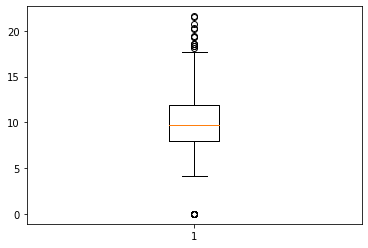

In [7]:
print("cm1:",CMF_1)
print("cm2:",CMF_2)
print("cm3:",CMF_3)
plt.boxplot(cos_1)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b5bc8871c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b5bc887760>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b5bc878fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b5bc887d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b5bc896040>],
 'means': []}

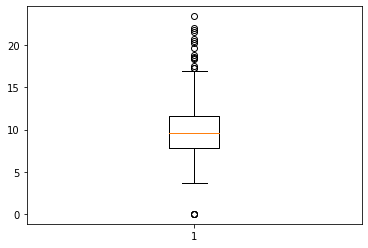

In [8]:
plt.boxplot(cos_2)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b5bc8ea2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b5bc8ea880>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b5bc8dbfd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b5bc8eae20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b5bc8f9130>],
 'means': []}

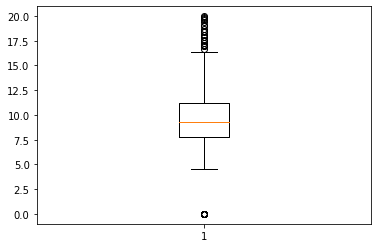

In [9]:
plt.boxplot(cos_3)

Valor presente neto de los costos de reparación:

In [10]:
tasa= 0.05
Pv_1= cos_1.mean() * 1/((1+tasa)**(0.5*TMF))

In [11]:
Pv_2= cos_2.mean() * 1/((1+tasa)**(0.75*TMF))

In [12]:
Pv_3= cos_3.mean() * 1/((1+tasa)**(0.5*TMF))

In [13]:
print(Pv_1)
print(cos_1.mean())
print(Pv_2)
print(cos_2.mean())
print(Pv_3)
print(cos_3.mean())

1.3992423767601705
10.015558175720201
0.5149283233184387
9.860980346056534
1.346424288441113
9.637494557096309


In [14]:
Pv_1/TMF_1

0.015535845871171974

In [15]:
Pv_2/TMF_2

0.005684095618196407

In [16]:
Pv_3/TMF_3

0.015170782444340674

Suponiendo que cada periodo evaluado se aplica la tasa de descuento y teniendo en cuenta que siempre se realizan en el mismo instante se puede calcular el valor presente neto de la forma :$\frac{F}{(1+\gamma)^n}$ donde F es el valor en el tiempo n, y gamma es la tasa de descuento aplicada en cada periodo. El tiempo n es 0.5 TMF para el caso 1 y 3 mientras que para el caso 2 es de 0.75 TMF.

In [17]:
print("El valor esperado del valor presente neto del costo de mantenimiento para la política I es de:",round(Pv_1,4))
print("El valor esperado del valor presente neto del costo de mantenimiento para la política II es de:",round(Pv_2,4))
print("El valor esperado del valor presente neto del costo de mantenimiento para la política III es de:",round(Pv_3,4))

El valor esperado del valor presente neto del costo de mantenimiento para la política I es de: 1.3992
El valor esperado del valor presente neto del costo de mantenimiento para la política II es de: 0.5149
El valor esperado del valor presente neto del costo de mantenimiento para la política III es de: 1.3464


Se puede concluir a través de unicamente el costo que la mejor alternativa es la política II ya que es la obtiene un costo mucho menor (más de la mitad) frente a las dos alternativas que efectuan su mantenimiento en la mitad de la vida útil. Este costo es  más elevado para la política 1 ya que esta se interviene siempre más que en la 3. Lo anterior, se explica ya que en algunos casos se suele realizar el mantenimiento por debajo del valor inicial y este costo sería menor por lo mismo.

Los valores esperados del valor presente neto por unidad de tiempo es el siguiente:

In [18]:
print("El valor esperado del costo por unidad de tiempo para la política I es de:",round(Pv_1/TMF_1,4))
print("El valor esperado del costo por unidad de tiempo para la política II es de:",round(Pv_2/TMF_2,4))
print("El valor esperado del costo por unidad de tiempo para la política III es de:",round(Pv_3/TMF_3,4))

El valor esperado del costo por unidad de tiempo para la política I es de: 0.0155
El valor esperado del costo por unidad de tiempo para la política II es de: 0.0057
El valor esperado del costo por unidad de tiempo para la política III es de: 0.0152


El valor esperado por costo de unidad de tiempo de la política II es mucho mejor debido a que su costo disminuye en un 50% y en este caso también es menos que la mitad de los otros dos valores. Se puede observar adicionalmente una leve diferencia dando como mejor alternativa, en términos de costos, la política III frente a la I.

In [19]:
print("El tiempo medio a la falla para la política I es de:",round(TMF_1,4))
print("El tiempo medio a la falla para la política II es de:",round(TMF_2,4))
print("El tiempo medio a la falla  para la política III es de:",round(TMF_3,4))

El tiempo medio a la falla para la política I es de: 90.0654
El tiempo medio a la falla para la política II es de: 90.5911
El tiempo medio a la falla  para la política III es de: 88.7511


In [20]:
#El tiempo medio a la falla sin política es de
round(TMF,4)

80.6806

Suponiendo que los valores para la vida útil (TMF) sean significativos ya que se puede observar en las gráficas de cajas y bigotes para las políticas que hay varios outliners de coste en cero, lo que significa que el sistema falla antes de intervenirse.Se puede observar que en general intervenir el sistema alarga su vida útil apróximadamente 10 periodos, un poco más para la política uno y un poco menos para la II. Lo que nos puede indicar que la mejor política podría decidirse únicamente por su costo monetario en valor presente neto sabiendo que intervienen casi lo mismo (7% dif. max.). Por lo que, considero que la política de intervención del caso II es más eficiente con el dinero invertido frente al cambio de TMF. 

<h2><center>Análisis de Sistemas de Infraestructura <br>
    Examen final: Parte II <br>
    Punto 2 </center></h2>

In [21]:
lambd2=0.1
c0=10**5
b=0.275*c0
cl=1.25*c0
t_x2=0
for i in range(10000):
    t_x2+=np.random.exponential(1/lambd2)
prom=t_x2/10000
print(prom)

10.25834485014184


In [22]:
res2= np.array([1,5,10,15,25])
print("Tasa\tValor presente neto")
for i in range(5):
    beneficios = b/(res2[i]/100)
    Beneficio_sin_costo0=beneficios-c0-(cl/(1+(res2[i]/100)**(prom)))
    print(res2[i],"%\t",round(Beneficio_sin_costo0,2))

Tasa	Valor presente neto
1 %	 2525000.0
5 %	 325000.0
10 %	 50000.0
15 %	 -41666.67
25 %	 -114999.92


In [23]:
lambd2=0.05
c0=10**5
b=0.275*c0
cl=1.25*c0
t_x2=0
for i in range(10000):
    t_x2+=np.random.exponential(1/lambd2)
prom2=t_x2/10000
print(prom2)

20.143874556749036


In [24]:
lambd2=0.2
c0=10**5
b=0.275*c0
cl=1.25*c0
t_x2=0
for i in range(10000):
    t_x2+=np.random.exponential(1/lambd2)
prom3=t_x2/10000
print(prom3)

5.123277984583872


In [25]:
lambd2=0.4
c0=10**5
b=0.275*c0
cl=1.25*c0
t_x2=0
for i in range(10000):
    t_x2+=np.random.exponential(1/lambd2)
prom4=t_x2/10000
print(prom4)

2.5078505507132567


In [26]:
res2= np.array([1,5,10,15,25])
print("Tasa\tlambda =0.1\tlambda=0.05\tlambda=0.2\tlambda=0.4")
for i in range(5):
    beneficios = b/(res2[i]/100)
    Beneficio_sin_costo0=beneficios-c0-(cl/(1+(res2[i]/100)**(prom)))
    be2=beneficios-c0-(cl/(1+(res2[i]/100)**(prom2)))
    be3=beneficios-c0-(cl/(1+(res2[i]/100)**(prom3)))
    be4=beneficios-c0-(cl/(1+(res2[i]/100)**(prom4)))
    print(res2[i],"%\t",round(Beneficio_sin_costo0,2),"\t",round(be2,2),"\t",round(be3,2),"\t",round(be4,2))

Tasa	lambda =0.1	lambda=0.05	lambda=0.2	lambda=0.4
1 %	 2525000.0 	 2525000.0 	 2525000.0 	 2525001.21
5 %	 325000.0 	 325000.0 	 325000.03 	 325068.22
10 %	 50000.0 	 50000.0 	 50000.94 	 50387.0
15 %	 -41666.67 	 -41666.67 	 -41659.15 	 -40602.63
25 %	 -114999.92 	 -115000.0 	 -114897.19 	 -111251.89


Los resultados son poco sensibles a cambios en lambda razonables

<h2><center>Análisis de Sistemas de Infraestructura <br>
    Examen final: Parte III <br>
    Punto 3 </center></h2>

In [27]:
m1=[[0.4,0.3,0.2,0.075,0.025],[0.3,0.5,0.1,0.075,0.025],[0.2,0.1,0.6,0.075,0.025],[0.075,0.025,0.1,0.7,0.1],[0.025,0.075,0.1,0.3,0.5]]
m2=[[0.5,0.3,0.1,0.075,0.025],[0,0.6,0.3,0.075,0.025],[0,0,0.8,0.0175,0.025],[0,0,0,0.975,0.025],[0,0,0,0,1]]
m3=[[0.5,0.3,0.1,0.075,0.025],[0,0.6,0.3,0.075,0.025],[0,0,0.8,0.0175,0.025],[0,0,0,0.975,0.025],[1,0,0,0,0]]
m1= np.matrix(m1)
m2= np.matrix(m2)
m3= np.matrix(m3)
m2

matrix([[0.5   , 0.3   , 0.1   , 0.075 , 0.025 ],
        [0.    , 0.6   , 0.3   , 0.075 , 0.025 ],
        [0.    , 0.    , 0.8   , 0.0175, 0.025 ],
        [0.    , 0.    , 0.    , 0.975 , 0.025 ],
        [0.    , 0.    , 0.    , 0.    , 1.    ]])

Para el sistema que solo puede permanecer en el estado actual o deterriorarse se selecciona la matriz dos (P2) ya que es la unica que tiene estas posibilidades en sus posiciones

In [28]:
#para dentro de 5 años
np.matmul(np.array([1,0,0,0,0]),np.linalg.matrix_power(m2, 5))

matrix([[0.03125   , 0.13953   , 0.33416   , 0.22988175, 0.11486025]])

In [29]:
#para dentro de 10 años
np.array([1,0,0,0,0])*m2**10*100//0.01/100

matrix([[ 0.09,  1.52, 17.22, 25.43, 19.04]])

In [30]:
#para dentro de 25 años
np.array([1,0,0,0,0])*m2**25*100//0.01/100

matrix([[ 0.  ,  0.  ,  0.69, 18.82, 29.84]])

In [31]:
#para dentro de 50 años
np.array([1,0,0,0,0])*m2**50*100//0.01/100

matrix([[ 0.  ,  0.  ,  0.  , 10.03, 38.77]])

La probabilidad para cada uno de estos vectores calculados indican la posibilidad de estar respectivamente en el estado 5, 4, 3, 2 o 1 según la posición de la fila. Por ejemplo, para el caso dentro de 5 años se obtiene una posibilidad de 3.12% de permanecer en el estado 5 después de 5 años.

In [32]:
prob_falla=np.zeros(50)
p0=np.array([1,0,0,0,0])
tiempo=0
m1_array = pd.DataFrame(m1)
while tiempo<50:
    prob_falla[tiempo]=np.matmul(p0,np.linalg.matrix_power(m1_array.to_numpy(), tiempo))[4]+np.matmul(p0,np.linalg.matrix_power(m1_array.to_numpy(), tiempo))[3]
    tiempo+=1
prob_falla

array([0.        , 0.1       , 0.17      , 0.219     , 0.2533    ,
       0.27731   , 0.294117  , 0.3058819 , 0.31411733, 0.31988213,
       0.32391749, 0.32674224, 0.32871957, 0.3301037 , 0.33107259,
       0.33175081, 0.33222557, 0.3325579 , 0.33279053, 0.33295337,
       0.33306736, 0.33314715, 0.33320301, 0.3332421 , 0.33326947,
       0.33328863, 0.33330204, 0.33331143, 0.333318  , 0.3333226 ,
       0.33332582, 0.33332807, 0.33332965, 0.33333076, 0.33333153,
       0.33333207, 0.33333245, 0.33333271, 0.3333329 , 0.33333303,
       0.33333312, 0.33333318, 0.33333323, 0.33333326, 0.33333328,
       0.3333333 , 0.33333331, 0.33333332, 0.33333332, 0.33333332])

Text(0, 0.5, 'Probabilidad de falla')

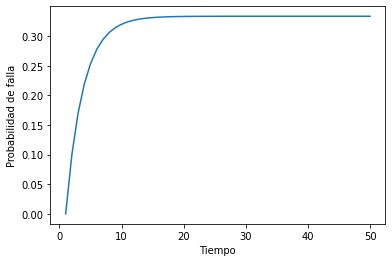

In [33]:
plt.plot(np.arange(1,51),prob_falla)
plt.xlabel("Tiempo") # Establecer el título del eje x
plt.ylabel("Probabilidad de falla") # Establecer el título del eje y

In [34]:
prob_falla=np.zeros(50)
p0=np.array([1,0,0,0,0])
tiempo=0
m2_array = pd.DataFrame(m2)
while tiempo<50:
    prob_falla[tiempo]=np.matmul(p0,np.linalg.matrix_power(m2_array.to_numpy(), tiempo))[4]+np.matmul(p0,np.linalg.matrix_power(m2_array.to_numpy(), tiempo))[3]
    tiempo+=1
prob_falla

array([0.        , 0.1       , 0.18425   , 0.2516    , 0.30415   ,
       0.344742  , 0.3760218 , 0.40016686, 0.41887439, 0.43343468,
       0.44481915, 0.45375833, 0.46080354, 0.4663735 , 0.47078847,
       0.47429521, 0.47708515, 0.47930767, 0.48107994, 0.48249428,
       0.48362364, 0.48452585, 0.48524685, 0.48582318, 0.48628397,
       0.48665243, 0.4869471 , 0.48718277, 0.48737127, 0.48752205,
       0.48764266, 0.48773914, 0.48781632, 0.48787806, 0.48792745,
       0.48796696, 0.48799857, 0.48802386, 0.48804409, 0.48806027,
       0.48807322, 0.48808357, 0.48809186, 0.48809849, 0.48810379,
       0.48810803, 0.48811142, 0.48811414, 0.48811631, 0.48811805])

Text(0, 0.5, 'Probabilidad de falla')

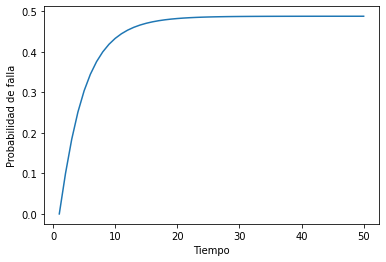

In [35]:
plt.plot(np.arange(1,51),prob_falla)
plt.xlabel("Tiempo") # Establecer el título del eje x
plt.ylabel("Probabilidad de falla") # Establecer el título del eje y

In [46]:
prob_falla=np.zeros(50)
p0=np.array([1,0,0,0,0])
tiempo=0
m3_array = pd.DataFrame(m3)
while tiempo<50:
    prob_falla[tiempo]=np.matmul(p0,np.linalg.matrix_power(m3_array.to_numpy(), tiempo))[4]+np.matmul(p0,np.linalg.matrix_power(m3_array.to_numpy(), tiempo))[3]
    tiempo+=1
prob_falla

array([0.        , 0.1       , 0.15925   , 0.204725  , 0.23782187,
       0.26141083, 0.27801137, 0.28956323, 0.29746907, 0.30271497,
       0.30598859, 0.30777229, 0.3084097 , 0.30815105, 0.30718309,
       0.30564863, 0.30365931, 0.30130406, 0.29865468, 0.29576983,
       0.29269778, 0.28947843, 0.28614492, 0.28272477, 0.27924091,
       0.2757124 , 0.27215513, 0.26858227, 0.26500477, 0.2614317 ,
       0.25787055, 0.25432749, 0.25080759, 0.24731499, 0.24385305,
       0.24042449, 0.23703147, 0.2336757 , 0.23035851, 0.22708093,
       0.22384368, 0.22064731, 0.21749214, 0.21437837, 0.21130605,
       0.20827513, 0.20528549, 0.20233691, 0.19942912, 0.19656182])

Text(0, 0.5, 'Probabilidad de falla')

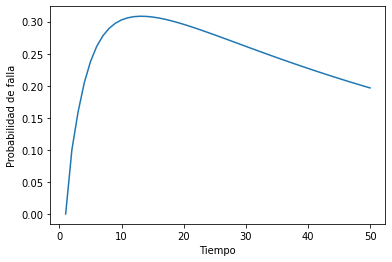

In [47]:
plt.plot(np.arange(1,51),prob_falla)
plt.xlabel("Tiempo") # Establecer el título del eje x
plt.ylabel("Probabilidad de falla") # Establecer el título del eje y

La principal diferencia se encuentra en la matriz uno ya que esta es la que presenta recuperación en cualquier estado y se estabiliza cercano a valores de 33%. Mientras que, para la matriz dos que no tiene recuperación el valor se estabiliza cercano al 50%. por último, para la matriz 3 tiene un cambio repentido frente a la tendencia de incrementar y después tiende a disminuir esta probabilidad.